# Centrality

In [2]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./../data/blocks.parquet')[['geometry', 'site_area', 'population']]
blocks_gdf.head()

,geometry,site_area,population
id,,,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6...",8.044667e+05,606
1,"POLYGON ((355412.142 6623378.149, 355411.700 6...",2.317313e+04,41
2,"POLYGON ((353934.329 6625429.433, 353923.453 6...",3.630058e+05,14
3,"POLYGON ((355099.099 6623847.765, 355074.808 6...",1.964145e+05,581
4,"POLYGON ((352766.168 6621954.748, 352744.412 6...",1.781752e+06,2004


In [3]:
from blocksnet.relations import generate_adjacency_graph

adjacency_graph = generate_adjacency_graph(blocks_gdf)

2025-03-26 20:22:16.809 | INFO     | blocksnet.relations.adjacency.core:_generate_adjacency_nodes:10 - Generating nodes.
2025-03-26 20:22:16.816 | INFO     | blocksnet.relations.adjacency.core:_generate_adjacency_edges:15 - Generating edges.
2025-03-26 20:22:17.372 | SUCCESS  | blocksnet.relations.adjacency.core:generate_adjacency_graph:34 - Adjacency graph successfully generated: 16320 nodes, 15920 edges


## Population centrality

In [4]:
from blocksnet.analysis.centrality import population_centrality

centrality_df = population_centrality(blocks_gdf, adjacency_graph)
centrality_df.head()

,population,degree_centrality,population_normalized,degree_centrality_normalized,population_centrality
id,,,,,
0,606,0.000061,1.019320,1.034483,0.026685
1,41,0.000306,1.001307,1.172414,0.085219
2,14,0.000123,1.000446,1.068966,0.034021
3,581,0.000061,1.018523,1.034483,0.026281
4,2004,0.000613,1.063889,1.344828,0.211031


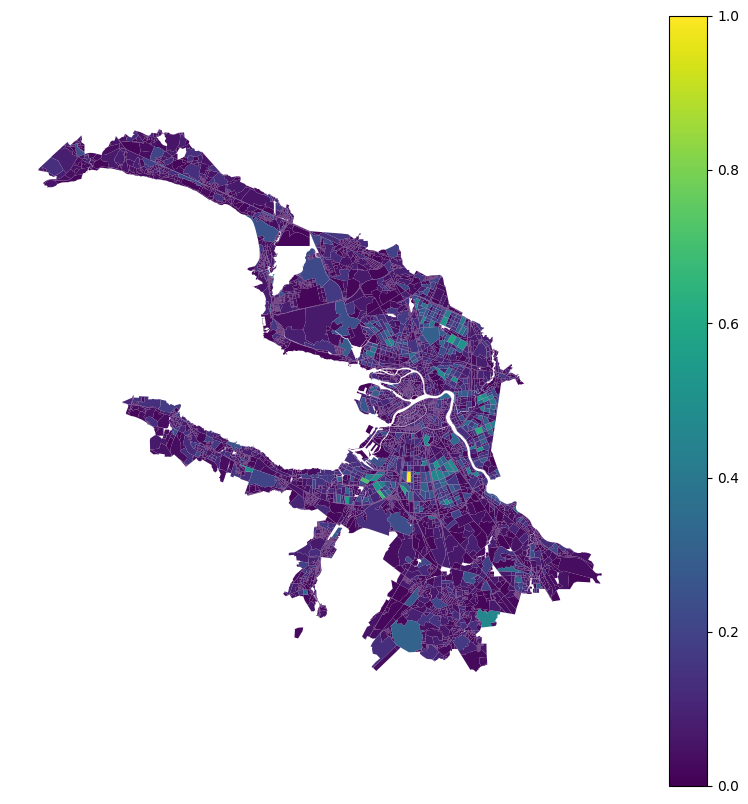

In [5]:
blocks_gdf[['geometry']].join(centrality_df).plot('population_centrality', legend=True, figsize=(10, 10)).set_axis_off()

## Service centrality

In [6]:
import pandas as pd

accessibility_matrix = pd.read_pickle('./../data/accessibility_matrix.pickle')
accessibility_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,16310,16311,16312,16313,16314,16315,16316,16317,16318,16319
0,0.000000,18.718750,9.234375,17.21875,30.296875,27.390625,30.671875,23.281250,78.6875,81.2500,...,76.5625,102.5625,97.5000,132.250,130.8750,142.125,247.625,228.625,247.625,124.6250
1,17.859375,0.000000,19.015625,7.65625,20.281250,25.250000,25.234375,15.765625,76.8750,79.4375,...,74.6875,100.7500,95.6875,130.500,129.0000,140.250,245.875,226.875,245.875,112.5000
2,9.234375,20.796875,0.000000,20.21875,27.968750,25.062500,28.343750,20.953125,71.8750,74.4375,...,69.7500,95.8125,90.6875,125.500,124.0625,135.375,240.875,221.875,240.875,124.6250
3,15.937500,7.449219,18.421875,0.00000,21.109375,24.984375,27.781250,16.593750,76.3125,78.8125,...,74.1250,100.1875,95.0625,129.875,128.5000,139.750,245.250,226.250,245.250,113.3750
4,31.906250,19.765625,31.734375,21.28125,0.000000,21.781250,23.125000,15.429688,89.5625,92.1250,...,87.4375,113.5000,108.3750,143.125,141.7500,153.000,258.500,239.500,258.500,108.3125


In [9]:
import geopandas as gpd

df = gpd.read_parquet('./../data/services.parquet').groupby(['block_id', 'service_type']).size().unstack(fill_value=0)
df.head()

service_type,bakery,bank,bar,beach,bowling_alley,cafe,cemetery,cinema,circus,convenience,...,stadium,substation,supermarket,swimming_pool,theatre,train_building,university,wastewater_plant,water_works,zoo
block_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
dfs = [df[[column]].rename(columns={column: 'count'}) for column in df.columns]
dfs[0].head()

service_type,count
block_id,
0,0
1,0
2,0
3,0
4,1


In [ ]:
from blocksnet.analysis.centrality import service_centrality

centrality_df = service_centrality(accessibility_matrix, blocks_gdf, dfs, diversity_weight=10)
centrality_df.head()

,shannon_diversity,density,connectivity,service_centrality
id,,,,
0,1.386294,0.000005,0.010292,0.588206
1,1.011404,0.000129,0.010727,0.440534
2,0.693147,0.000003,0.011009,0.314157
3,1.242453,0.000015,0.010735,0.532881
4,1.497866,0.000006,0.009941,0.631100


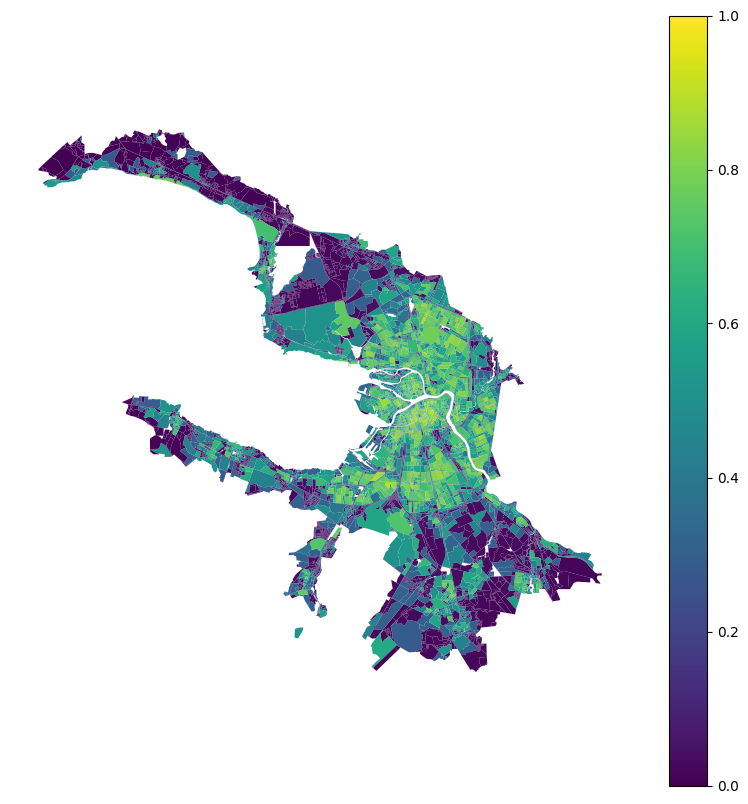

In [12]:
blocks_gdf[['geometry']].join(centrality_df).plot('service_centrality', legend=True, figsize=(10, 10), vmin=0, vmax=1).set_axis_off()